<center><h1>Live Project Demo<h1><center>

# 1. Data Collection

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("HeartDisease.csv")

In [3]:
data.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,5,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary


In [4]:
data.shape

(457, 13)

# 2. Data Exploration

## Variable Identification

1. id: patient identification number
3. age: age in years
4. sex: sex (1 = male; 0 = female)
9. cp: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
10. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
12. chol: serum cholestoral in mg/dl
16. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
19. restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
32. thalach: maximum heart rate achieved
38. exang: exercise induced angina (1 = yes; 0 = no)
40. oldpeak = ST depression induced by exercise relative to rest
58. num: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)
59. place: Collection Country

In [50]:
data['Age'].max()

75.0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
ID          457 non-null int64
Age         457 non-null int64
Sex         457 non-null int64
cp          457 non-null int64
trestbps    424 non-null float64
chol        431 non-null float64
fbs         403 non-null float64
restecg     455 non-null float64
thalach     424 non-null float64
exang       424 non-null float64
oldpeak     421 non-null float64
num         457 non-null int64
Place       457 non-null object
dtypes: float64(7), int64(5), object(1)
memory usage: 46.5+ KB


In [31]:
categorical_cols = ['Sex', 'cp', 'fbs', 'restecg', 'exang']
numerical_col = ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [8]:
data[numerical_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,457.0,50.962801,9.219588,28.0,45.0,52.0,57.0,75.0
trestbps,424.0,131.488208,18.829454,80.0,120.0,130.0,140.0,200.0
chol,431.0,200.048724,113.463794,0.0,171.0,220.0,269.5,603.0
thalach,424.0,134.910377,24.251177,69.0,118.0,135.0,150.0,190.0
oldpeak,421.0,0.622090,0.922115,-2.6,0.0,0.0,1.0,5.0


In [13]:
data[numerical_col+categorical_cols].isnull().sum()

Age          0
trestbps    33
chol        26
thalach     33
oldpeak     36
Sex          0
cp           0
fbs         54
restecg      2
exang       33
dtype: int64

In [16]:
for col in numerical_col:
    data[col] = data[col].fillna(data[col].median())

In [18]:
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].value_counts().idxmax())

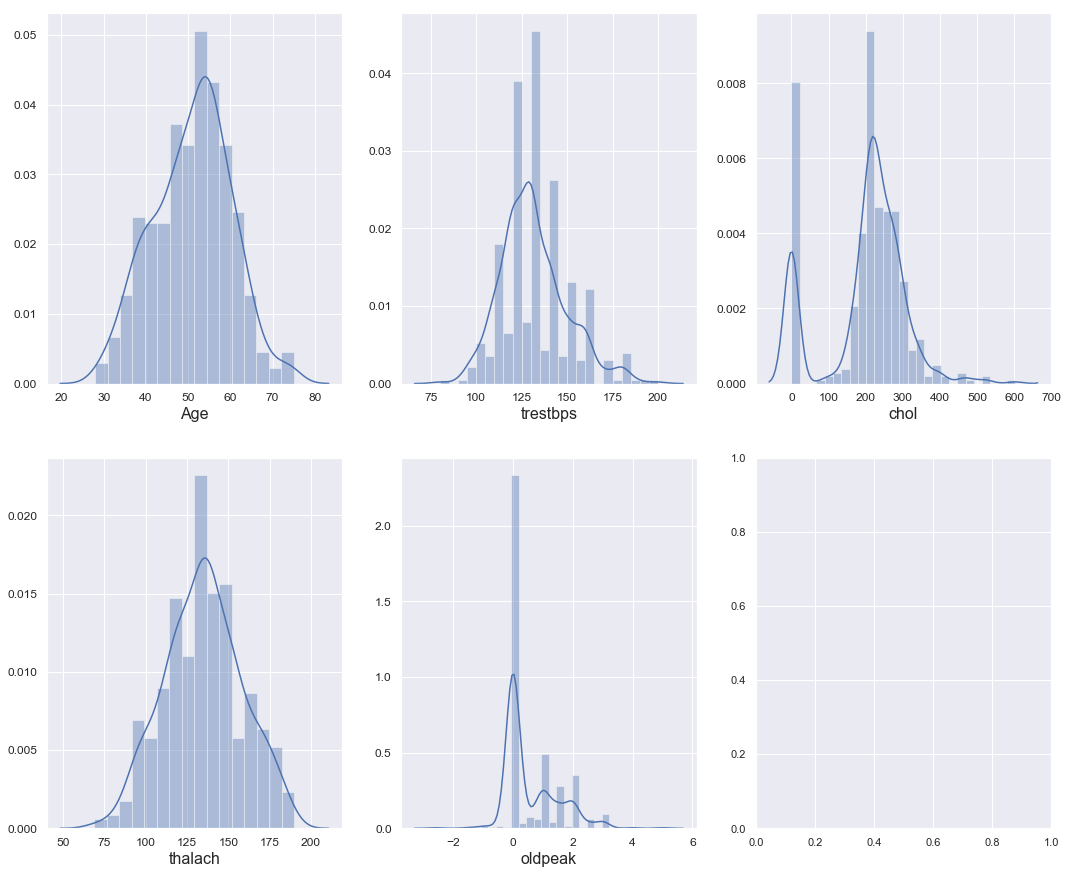

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data, numerical_col)

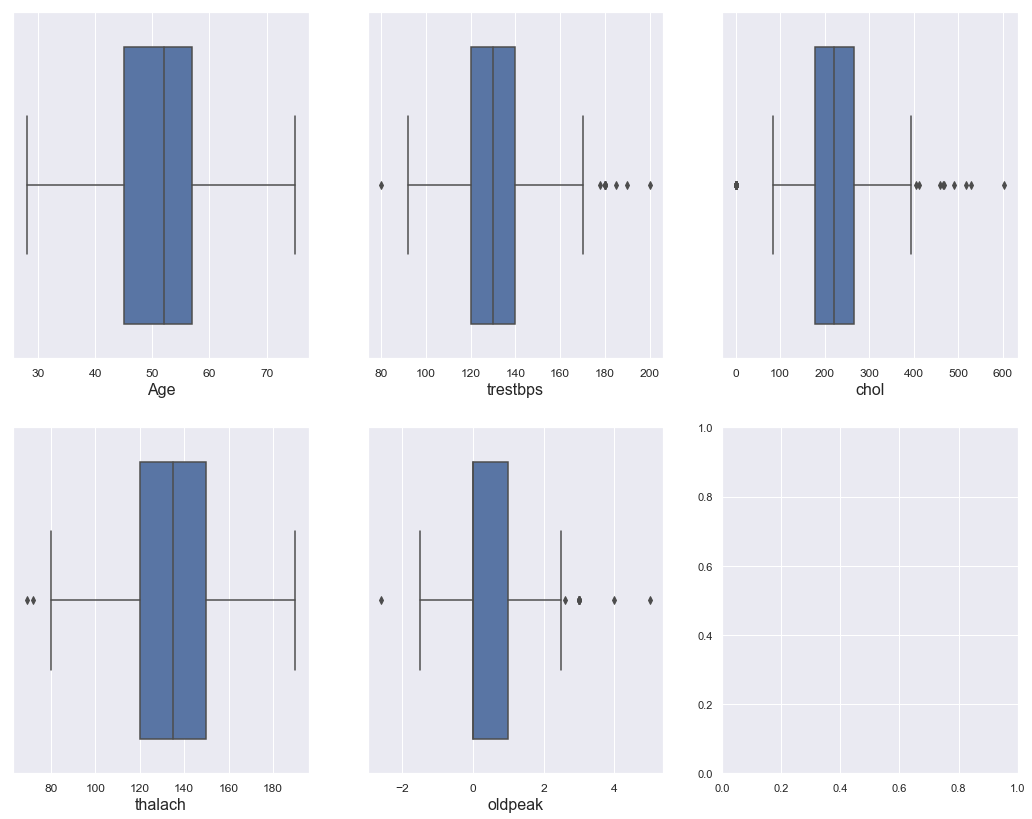

In [25]:
def plot_boxplot(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,14))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_boxplot(data, numerical_col)

In [38]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [39]:
for col in numerical_col:
    print(col,'-->',detect_outlier(data[col]))

Age --> []
trestbps --> [35, 72, 84, 172, 181, 245, 266, 292, 314, 315, 338, 354, 382, 437]
chol --> [70, 131, 197, 225, 243, 263, 265, 281, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 353, 354, 357, 358, 359, 360, 363, 364, 365, 366, 369, 371, 372, 373, 375, 377, 378, 380, 381, 382, 385, 386, 392, 401, 402, 404, 414]
thalach --> [336, 392]
oldpeak --> [137, 192, 218, 234, 248, 253, 264, 279, 283, 286, 291, 303, 325, 394, 402]


In [40]:
for col in numerical_col:
    indx = detect_outlier(data[col])
    data[col].loc[indx] = data[col].median()

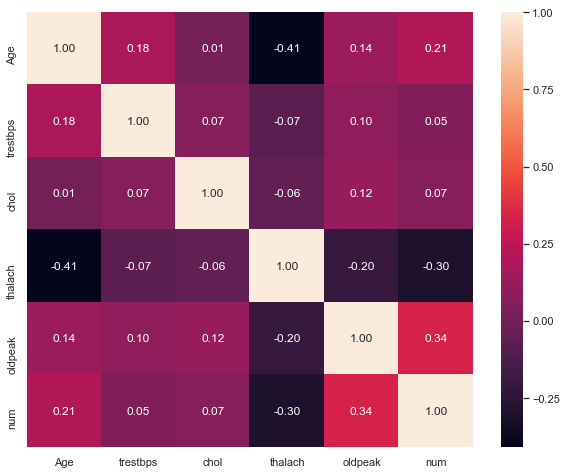

In [42]:
corr = data[numerical_col+['num']].corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f");

In [43]:
data['num'].value_counts()

0    247
1    210
Name: num, dtype: int64

In [54]:
data['age_group'] = pd.cut(data['Age'],bins=[27, 35, 50, 75], labels=['yong','middle','old'])

In [57]:
data = pd.get_dummies(data, columns=categorical_cols, prefix=categorical_cols)

In [62]:
data.drop(['ID', 'Place'], axis=1, inplace=True)

In [63]:
X = data.loc[:, data.columns!='num']
y = data.loc[:, data.columns=='num']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [72]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
np.arange(10, 100, 15)

array([10, 25, 40, 55, 70, 85])

In [78]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_lr = {
    'C': np.logspace(-5, 8, 15),
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,20,5)
}

In [75]:
def randomsearch(X, y, estimator, param_grid, cv=5, n_iter=10, n_jobs=2, random_state=1234):
    random = RandomizedSearchCV(estimator=estimator, 
                                param_distributions=param_grid, 
                                cv=cv, 
                                n_iter=n_iter, 
                                n_jobs=n_jobs,
                                random_state=random_state)
    random.fit(X, y)
    return random.best_params_

In [80]:
randomsearch(X_train, y_train, LogisticRegression(), param_grid_lr)

/home/imran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'penalty': 'l2', 'C': 3.727593720314938}

In [79]:
randomsearch(X_train, y_train, DecisionTreeClassifier(), param_grid_dt)

/home/imran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 12, 'criterion': 'entropy'}

In [82]:
model1 = LogisticRegression(penalty='l2', C=3.727593720314938).fit(X_train, y_train)
m1_ypred = model1.predict(X_test)

model2 = DecisionTreeClassifier(min_samples_split= 12, criterion='entropy').fit(X_train, y_train)
m2_ypred = model2.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

m1_acc = accuracy_score(y_test, m1_ypred)
print(m1_acc)

print(confusion_matrix(y_test, m1_ypred))

0.8586956521739131
[[48  2]
 [11 31]]


In [87]:
m2_acc = accuracy_score(y_test, m2_ypred)
print(m2_acc)

print(confusion_matrix(y_test, m2_ypred))

0.782608695652174
[[41  9]
 [11 31]]


In [89]:
print('Intercept of the Regression model:', -model1.intercept_[0])
print('\nSlope/Coefficients of the Regression model:')
slope = pd.DataFrame(model1.coef_.T, X_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
slope

Intercept of the Regression model: 0.06894406742893147

Slope/Coefficients of the Regression model:


,Coefficient
cp_4,0.944657
age_group_yong,0.906727
exang_1.0,0.578900
Sex_1,0.449206
fbs_1.0,0.440341
oldpeak,0.362546
restecg_0.0,0.305008
cp_1,0.196633
Age,0.042878
chol,0.000280


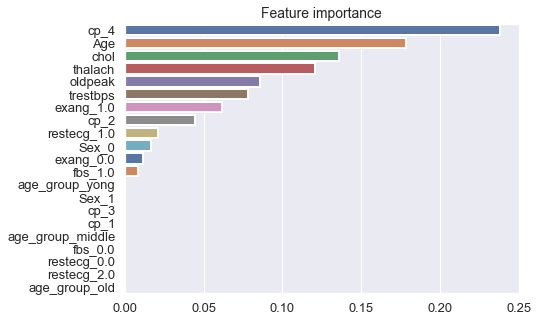

In [90]:
coef = pd.Series(model2.feature_importances_, index = X.columns)
imp_coef = coef.sort_values(ascending=False)

def plot_importance(feat_imp, feat_name):
    fig, ax = plt.subplots(figsize=(8,5)) 
    sns.set(style="darkgrid", context="poster")
    sns.barplot(feat_imp, feat_name, palette="deep")
    plt.title("Feature importance", fontsize=14)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.tight_layout()
    
plot_importance(imp_coef.values, imp_coef.index)